### sample global daily precipitation data file for 2014 
#### Source:

Dr. Sarah B. Kapnick, Research Physical Scientist, NOAA/Geophysical Fluid Dynamics Laboratory

In [18]:
%matplotlib inline 
import xarray

### Open the precipitation data file and check the contents

In [2]:
ds = xarray.open_dataset(r'c:/work/datadrive/GCM/atmos_daily.20140101-20141231.precip.nc')
ds

<xarray.Dataset>
Dimensions:     (bnds: 2, lat: 360, lon: 576, time: 365)
Coordinates:
  * bnds        (bnds) float64 1.0 2.0
  * lat         (lat) float64 -89.75 -89.25 -88.75 -88.25 -87.75 -87.25 ...
  * lon         (lon) float64 0.3125 0.9375 1.562 2.188 2.812 3.438 4.062 ...
  * time        (time) datetime64[ns] 2014-01-01T12:00:00 ...
Data variables:
    average_DT  (time) timedelta64[ns] 1 days 1 days 1 days 1 days 1 days ...
    average_T1  (time) datetime64[ns] 2014-01-01 2014-01-02 2014-01-03 ...
    average_T2  (time) datetime64[ns] 2014-01-02 2014-01-03 2014-01-04 ...
    lat_bnds    (lat, bnds) float64 -90.0 -89.5 -89.5 -89.0 -89.0 -88.5 ...
    lon_bnds    (lon, bnds) float64 0.0 0.625 0.625 1.25 1.25 1.875 1.875 ...
    precip      (time, lat, lon) float64 5.618e-06 5.618e-06 5.618e-06 ...
    time_bnds   (time, bnds) timedelta64[ns] 0 days 1 days 1 days 2 days ...
Attributes:
    filename:      atmos_daily.20140101-20141231.precip.nc
    title:         c192L33_am4p0_hima

### Looks good! Lat and lon as coordinates, nice!

### Next, the static file which contains land surface elevation and ocean/land mask

In [7]:
ds2 = xarray.open_dataset(r'c:/work/datadrive/GCM/atmos_daily.static.nc')
ds2

<xarray.Dataset>
Dimensions:    (bnds: 2, lat: 360, lon: 576, phalf: 34)
Coordinates:
  * phalf      (phalf) float64 1.0 4.0 8.186 13.79 20.92 29.84 41.22 55.79 ...
  * lat        (lat) float64 -89.75 -89.25 -88.75 -88.25 -87.75 -87.25 ...
  * lon        (lon) float64 0.3125 0.9375 1.562 2.188 2.812 3.438 4.062 ...
Dimensions without coordinates: bnds
Data variables:
    bk         (phalf) float64 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.00513 ...
    pk         (phalf) float64 100.0 400.0 818.6 1.379e+03 2.092e+03 ...
    area       (lat, lon) float64 3.337e+09 3.337e+09 3.337e+09 3.337e+09 ...
    land_mask  (lat, lon) float64 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 ...
    lat_bnds   (lat, bnds) float64 -90.0 -89.5 -89.5 -89.0 -89.0 -88.5 -88.5 ...
    lon_bnds   (lon, bnds) float64 0.0 0.625 0.625 1.25 1.25 1.875 1.875 2.5 ...
    zsurf      (lat, lon) float64 2.829e+03 2.829e+03 2.829e+03 2.829e+03 ...
Attributes:
    filename:      atmos_daily.static.nc
    title:         c192L33_am4p0_

### Example of data in the static file

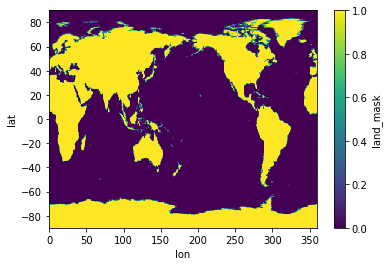

In [11]:
ds2.land_mask.plot()

### Plot precipitation by season for land surfaces only

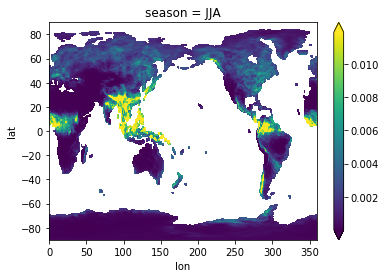

In [19]:
ds_by_season = ds.precip.groupby('time.season').sum('time')
prec_seasonal = ds_by_season.sel(season='JJA')
prec_seasonal.where(ds2.land_mask > 0).plot(robust=True)

### Calculate daily global total precip

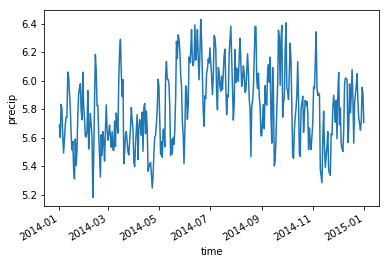

In [14]:
ds.precip.groupby('time').sum().plot()